<a href="https://colab.research.google.com/github/WINIRAIS/ADA-Informes/blob/main/RadixSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema de Ordenamiento RadixSort


**Entrada**: Una secuencia de números de tamaño N  $[a_1,a_2,...,a_n]$\
Esto refiere a que se tendrá una serie de números los cuales estarán en un orden disperso como se muestra en la imagen de a continuación, ojo que si la longitud de la lista o arreglo es 0 o 1 , este ya esta ordenado.\
**Salida** : La misma secuencia ordenada de tal manera que   [$a_1' \leq a_2' \leq a_3' .... \leq a_n'$] \
Esto indica que la misma secuencia ingresada anteriormente se mostrara ordenada de menor a mayor.

![image](https://book.huihoo.com/data-structures-and-algorithms-with-object-oriented-design-patterns-in-c++/html/img2225.gif)

# 2. Radix Sort

El siguiente código muestra la implementación del **Radix sort**


# 2.1. Código

In [37]:
#LIBRERIAS
from termcolor import colored as color
import random as r
import datetime
from timeit import repeat
from numpy import copy
import matplotlib.pyplot as plt

In [30]:
def countingSort(array,exp):
    global verbose
    size = len(array)
    output = [0] * size

    # inicia el conteo del arreglo
    count = [0] * 10

    # Almacene el recuento de cada elemento en el arreglo
    for i in range(0, size):
        index = array[i] // exp
        count[index % 10] += 1
        
    # Guarda la suma del conteo
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Encuentra el índice de cada elemento del arreglo original en el arreglo conteo
    # colocar los elementos en el arreglo de salida
    i = size - 1
    if verbose: print(color("ArrayC","blue"),count,color("\nArrayB","blue"),output)
    while i >= 0:
        
        index = array[i] // exp
        output[count[index % 10] - 1] = array[i]
        count[index % 10] -= 1
        i -= 1
        if verbose: print(color("\nArrayC","blue"),count,color("\nArrayB","blue"),output,color(f"\nInsertado:","cyan"),array[i])

    #Copie los elementos ordenados 
    for i in range(0, size):
        array[i] = output[i]

In [31]:
def radixSort(arr):
    global verbose
    max1 = max(arr)
    exp = 1
    cifra = 1
    while max1 / exp >= 1:
        if verbose: print(color(f"\nCifras N°{cifra}","green"))
        countingSort(arr, exp)
        cifra += 1
        exp *= 10
        if verbose: print(color(f"\nResultado:","magenta"),arr)

In [32]:
def bucketSort(A):
    B = []
    m = max(A)
    n = len(A)

    for i in range(n): B.append([])
    for i in A: B[int(i*(n-1)/m)].append(i)
    for i in range(n): B[i] = insertionSort(B[i])

    k = 0
    for i in B:
        for j in i:
            A[k] = j
            k += 1

def insertionSort(b):
    for i in range(1, len(b)):
        up = b[i]
        j = i - 1
        while j >= 0 and b[j] > up: 
            b[j + 1] = b[j]
            j -= 1
        b[j + 1] = up
    return b

In [39]:
#Main 
var = r.randint(1,10)
data = r.sample(range(0,100),var)
verbose = False
print(color("Entrada: ","red"),data)
radixSort(data)
print(color("Salida : ","blue"), data)

Entrada:  [9, 77, 26, 24, 88, 21, 63, 73]
Salida :  [9, 21, 24, 26, 63, 73, 77, 88]


# 2.2. Descripción del algoritmo

La idea general del algoritmo Radix sort es tener en cuenta que las claves permanecen formadas por dígitos. La versión estable de Radix sort requiere un arreglo auxiliar del mismo tamaño del arreglo a ordenar. 

En cada iteración, Radix sort puede usar cualquier procedimiento de ordenación para ordenar un dígito de las claves. 

El algoritmo de conteo realiza 4 pasos para la ordenación de cada dígito.


1. **$Inicialización$** **$de$** **$Contadores$** : Inicializa a cero los contadores que el algoritmo va a utilizar.

2.  **$Conteo$** : El paso de conteo calcula un histograma de los valores del dígito para las claves almacenadas en el arreglo.

3. **$Suma$** **$Parcial$** : se calcula la suma parcial de los contadores.

4. **$Movimiento$** : Se leen cada una de las claves del arreglo para poder sobreescribirlas en el otro array auxiliar.

![image](https://www.researchgate.net/publication/291086231/figure/fig1/AS:614214452404240@1523451545568/Simplistic-illustration-of-the-steps-performed-in-a-radix-sort-In-this-example-the.png)

#2.3.  Ejemplo


A[1,5,3,2,0,0,1,4,2,2] - C[2,2,3,1,1,1] - B[0,0,0,0,0,0,0,0,0,0]\
A[1,5,3,2,0,0,1,4,2,**2**] - C[2,4,**7**,8,9,10] - B[0,0,0,0,0,0,2,0,0,0]\
A[1,5,3,2,0,0,1,4,**2**,2] - C[2,4,**6**,8,9,10] - B[0,0,0,0,0,2,2,0,0,0]\
A[1,5,3,2,0,0,1,**4**,2,2] - C[2,4,5,8,**9**,10] - B[0,0,0,0,0,2,2,0,4,0]\
A[1,5,3,2,0,0,**1**,4,2,2] - C[2,**4**,5,8,8,10] - B[0,0,0,1,0,2,2,0,4,0]\
A[1,5,3,2,0,**0**,1,4,2,2] - C[**2**,3,5,8,8,10] - B[0,0,0,1,0,2,2,0,4,0]\
A[1,5,3,2,**0**,0,1,4,2,2] - C[**1**,3,5,8,8,10] - B[0,0,0,1,0,2,2,0,4,0]\
A[1,5,3,**2**,0,0,1,4,2,2] - C[0,3,**5**,8,8,10] - B[0,0,0,1,2,2,2,0,4,0]\
A[1,5,**3**,2,0,0,1,4,2,2] - C[0,3,4,**8**,8,10] - B[0,0,0,1,2,2,2,3,4,0]\
A[1,**5**,3,2,0,0,1,4,2,2] - C[0,3,4,7,8,**10**] - B[0,0,0,1,2,2,2,3,4,5]\
A[**1**,5,3,2,0,0,1,4,2,2] - C[0,**3**,4,7,8,9] - B[0,0,1,1,2,2,2,3,4,5]\
Resultado: [0,0,1,1,2,2,2,3,4,5]


# 2.4. Ejecución del algoritmo paso a paso (verbose=True)

Con la opción verbose `True` se podra ver lo que ocurre paso a paso

In [36]:
#Main
var = r.randint(1,10)
data = r.sample(range(0,100),var)
verbose = True
print(color("Entrada: ","red"),data)
radixSort(data)
print(color("Salida : ","blue"), data)

Entrada:  [10, 44, 41, 40, 83, 45, 88, 65]

Cifras N°1
ArrayC [2, 3, 3, 4, 5, 7, 7, 7, 8, 8] 
ArrayB [0, 0, 0, 0, 0, 0, 0, 0]

ArrayC [2, 3, 3, 4, 5, 6, 7, 7, 8, 8] 
ArrayB [0, 0, 0, 0, 0, 0, 65, 0] 
Insertado: 88

ArrayC [2, 3, 3, 4, 5, 6, 7, 7, 7, 8] 
ArrayB [0, 0, 0, 0, 0, 0, 65, 88] 
Insertado: 45

ArrayC [2, 3, 3, 4, 5, 5, 7, 7, 7, 8] 
ArrayB [0, 0, 0, 0, 0, 45, 65, 88] 
Insertado: 83

ArrayC [2, 3, 3, 3, 5, 5, 7, 7, 7, 8] 
ArrayB [0, 0, 0, 83, 0, 45, 65, 88] 
Insertado: 40

ArrayC [1, 3, 3, 3, 5, 5, 7, 7, 7, 8] 
ArrayB [0, 40, 0, 83, 0, 45, 65, 88] 
Insertado: 41

ArrayC [1, 2, 3, 3, 5, 5, 7, 7, 7, 8] 
ArrayB [0, 40, 41, 83, 0, 45, 65, 88] 
Insertado: 44

ArrayC [1, 2, 3, 3, 4, 5, 7, 7, 7, 8] 
ArrayB [0, 40, 41, 83, 44, 45, 65, 88] 
Insertado: 10

ArrayC [0, 2, 3, 3, 4, 5, 7, 7, 7, 8] 
ArrayB [10, 40, 41, 83, 44, 45, 65, 88] 
Insertado: 65

Resultado: [10, 40, 41, 83, 44, 45, 65, 88]

Cifras N°2
ArrayC [0, 1, 1, 1, 5, 5, 6, 6, 8, 8] 
ArrayB [0, 0, 0, 0, 0, 0, 0, 0]

ArrayC [0, 1,

# 3. Correctitud

#Prueba de Correctitud
En esta sección probaremos si el algoritmo **CountingSort** funciona correctamente, para esto utilizaremos inducción matemática.

Para llevar a cabo este método y saber si el algoritmo es correcto en arreglos de largo $n$, se necesita conocer que ocurre en dos casos específicos:
- **Caso Base:** Se debe conocer que ocurre al usar el algoritmo CountingSort en un arreglo de un solo elemento.
- **Caso General:** Para este caso se debe estudiar que ocurre al utilizar este algoritmo en arreglos de largo $m$, con $m < n$.

###**Caso Base**
En arreglos de largo $1$, CountingSort lo único que hará es devolver el mismo arreglo, ya que desde el inicio está ordenado.

###**Caso General (invariante)**
El único valor que no cambia dentro del desarrollo del algoritmo es el valor de K, puesto que es 
una constante que nos dará el número de posiciones que tendrá el arreglo C y como se mantiene el valor , nuestro caso general no cambiara tampoco siguiendo el mismo patrón dejando asi ordenado cada bucket , con arreglos de largo $m$ , $m < n$. 


#4. Tiempo de ejecución
###**CountingSort**
Para empezar, estudiaremos el tiempo de ejecución de CountingSort. Este algoritmo se ejecuta ordenando arreglos de largo $n$, donde $k$ es el rango (diferencia entre el mínimo y máximo) de los números que se ordenarán.  
Sumando todos los procesos de los cicols iterativos, el algoritmo resulta en:
- $T(n) = k + n + (k-1) + n$ 
- $T(n) = 2n + 2k -1$

Como siempre hace lo mismo sin importar el estado del arreglo de entrada, no hay ni mejor caso, en esta situación, se eliminan las constantes, por lo que el tiempo de ejecución de CountingSort resulta en:
- $Θ(n + k)$

###**RadixSort**
RadixSort lo que hace es llamar repetidas veces a CountingSort, por lo que la complejidad temporal de este algoritmo es:
- $Θ(a(n+k))$

En este caso $a$ es la cantidad de dígitos que contiene el mayor número dentro del arreglo de entrada.  
Pero podemos darnos cuenta que RadixSort sólo ordena números por sus dígitos, es decir, que $k = 10$, pasaría a ser constante, es decir que el tiempo de ejecución final del algoritmo RadixSort es:
- $Θ(n \cdot k)$

Con $n$ la cantidad de elementos del arreglo, y $k$ con la cantidad de dígitos que contiene el mayor número dentro de este arreglo.

# 5. Experimentos


# 5.1. Tiempo de ejecución(experimental)
En el siguiente gráfico se reporta el tiempo de ejecución del algoritmo **RadixSort** vs **BucketSort** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$.

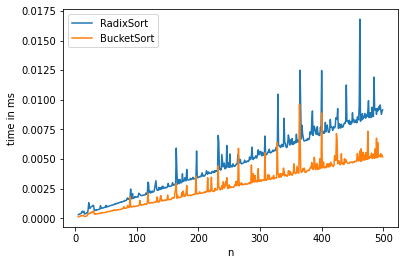

In [41]:
x=[]; y=[]; y2=[]

for n in range(5,500):

  a = r.sample(range(0, 1000), n)
  b = copy(a)

  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat = 1, number = 10)

  x.append(n)
  y.append(t)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x, y2)
plt.legend(["RadixSort", "BucketSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados
Como se puede observar el tiempo de ejecución de bucket sort es un poco mejor que el de radixSort , esto se debe a que el tiempo de RadixSort es de O($n+k$) mientras que el de bucketSort es de O($n$)

In [44]:
def InsertionSortF (Array):

  for j in range (1, len(Array)):
    elem_comparacion = Array[j]
    i = j-1
    while(i >= 0) and (Array[i] > elem_comparacion ):
      Array[i+1] = Array[i]
      i = i -1
      
    Array[i+1] = elem_comparacion

  return Array

A = [5,3,2,1,4,6]
print("Entrada: ",A)
A = InsertionSortF(A)
print("Salida: ",A)

Entrada:  [5, 3, 2, 1, 4, 6]
Salida:  [1, 2, 3, 4, 5, 6]


In [50]:
def MergeSort(A):
   if len(A) == 1 or len(A) == 0: 
     return A  #si el largo del array es 0 o 1 indica que ya esta ordenado
   else:
     if len(A) > 1:
      mitad = ((len(A))//2) #elemento medio del arreglo
      lado_izq = A[:mitad] #ordena la parte izquierda del arreglo que va del inicio hasta la mitad
      lado_der = A[mitad:] #ordena la parte derecha del arreglo que va de la mitad hasta el final

      #Se llama Recursivamente
      MergeSort(lado_izq)
      MergeSort(lado_der) 
      Merge(lado_izq,lado_der,A)
    
#Función Merge reordena todos los elementos en un arreglo

def Merge(izq,der,A):
  i=0 #indices
  j=0 #indices
  k=0 #indices 
  array = A

  while(i < len(izq) and j < len(der)):
    if izq[i] < der[j]:
      array[k] = izq[i]
      i += 1
    else:
      array[k] = der[j]
      j += 1
    k += 1
  
  while i < len(izq):
            array[k] = izq[i]
            i += 1
            k += 1
  while j < len(der):
            array[k] = der[j]
            j += 1
            k += 1
 
  return array


A = [39,27,43,3,9,82,10]
print(color("Entrada: ","red"),A)
MergeSort(A)
print(color("Salida: ", "blue"),A)


Entrada:  [39, 27, 43, 3, 9, 82, 10]
Salida:  [3, 9, 10, 27, 39, 43, 82]


In [47]:
def quicksortF(array, first, last): 
    if first < last:

      pivote = particionF(array, first, last)
      quicksortF(array, first,pivote)
      quicksortF(array, pivote + 1, last)
      
def particionF(arreglo, left, right):
    pivote = arreglo[left]

    while True:#iteracion general para comparar los elementos
        while left <= right and arreglo[left] < pivote:
            left += 1

        while left <= right and arreglo[right] > pivote:
            right -= 1

        if left >= right:
            return right 
        else:
            arreglo[left], arreglo[right] = arreglo[right], arreglo[left]
            left += 1
            right -= 1

var = r.randint(1,10)
Array = r.sample(range(0,100),var)
print(color("Entrada:","red"),Array)
quicksortF(Array,0,var-1)
print(color("Salida:", "blue"), Array)

Entrada: [85, 13, 64, 14, 56, 73, 38, 3, 45]
Salida: [3, 13, 14, 38, 45, 56, 64, 73, 85]


# 5.1. Tiempo de ejecución varios algortimos(experimental)
En el siguiente gráfico se reporta el tiempo de ejecución de los algoritmos **RadixSort**,**BucketSort**,**quicksortF**,**MergeSort**,**InsertionSortF** en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $500$.

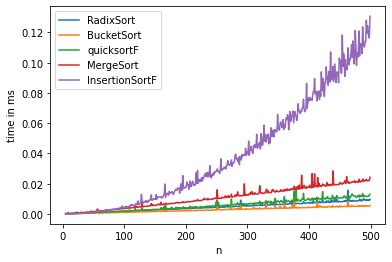

In [52]:
x=[]; y=[]; y2=[] ; y3 = [] ; y4 = []; y5 = []

for n in range(5,500):

  a = r.sample(range(0, 1000), n)
  b = copy(a)

  t = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat = 1, number = 10)
  t3 = repeat(setup="from __main__ import quicksortF", stmt=f"quicksortF({a},{0},{len(a)-1})", repeat = 1, number = 10)
  t4 = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a})", repeat = 1, number = 10)
  t5 = repeat(setup="from __main__ import InsertionSortF", stmt=f"InsertionSortF({a})", repeat = 1, number = 10)

  x.append(n)
  y.append(t)
  y2.append(t2)
  y3.append(t3)
  y4.append(t4)
  y5.append(t5)

plt.plot(x,y)
plt.plot(x, y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.plot(x, y5)
plt.legend(["RadixSort", "BucketSort", "quicksortF","MergeSort","InsertionSortF"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados
Se puede evidenciar que el algoritmo más malo en cuestión de tiempo seria el insetionSort teniendo un comportamiento cuadrático, en cambio el mejor seguirá siendo el bucketSort en comparación del resto.